<a href="https://colab.research.google.com/github/wandalistathea/customer-segmentation/blob/main/Customer%20Segmentation%20(Clustering%20Menggunakan%20K-Means%20%26%20Agglomerative).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sumber Data: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Hanya akan menggunakan 2 features agar dapat divisualisasikan
# "Annual Income" dan "Spending Score"
X = dataset.iloc[:, 3:5]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# Ukuran data (kolom, baris)
X.shape

(200, 2)

In [ ]:
# Cek data missing
X.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Ringkasan data
X.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


## 1. K-MEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Berapa cluster-nya
KMeans(n_clusters = 2).fit(X).score(X)

-181363.59595959607

In [ ]:
# Penilaian, melihat distribusinya efisien atau tidak
# Menggunakan Score
scr = []

for i in range(1, 15):
    score = KMeans(n_clusters = i, random_state = 14).fit(X).score(X)
    scr.append(round(score, 2))

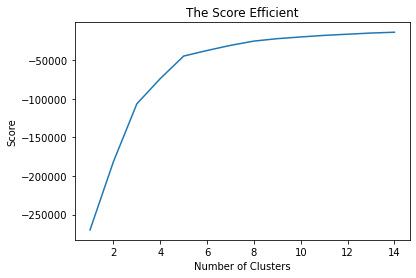

In [ ]:
# Menggunakan Score
plt.plot(range(1, 15), scr)
plt.title("The Score Efficient")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.show()

# Ambil nilai yang ada di patahannya (belokannya)
# Kira2 ambil cluster = 5

In [ ]:
# Cara lain (menggunakan Elbow Method)
wcss = [] # wcss -> Within Cluster Sum of Squares

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 14)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

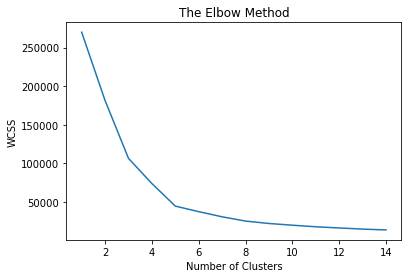

In [ ]:
# Cara lain (menggunakan Elbow Method)
plt.plot(range(1, 15), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Pakai cluster = 5
kmeans = KMeans(n_clusters = 5, random_state = 14)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=14)

In [ ]:
# Cara lain untuk melihat hasil cluster
# y_pred = kmeans.fit_predict(X)

In [ ]:
kmeans.labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 4, 2, 4, 2, 4,
       0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [ ]:
hasil_kmeans = X.copy()
hasil_kmeans["cluster"] = kmeans.labels_

In [ ]:
hasil_kmeans.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


### Visualisasi Hasil Clustering (K-Means)

Text(0, 0.5, 'Frekuensi')

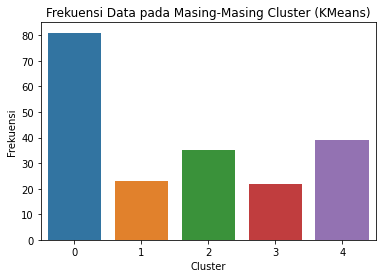

In [ ]:
cluster_x = hasil_kmeans["cluster"].value_counts().index
cluster_y = hasil_kmeans["cluster"].value_counts().values

sns.barplot(cluster_x, cluster_y)
plt.title("Frekuensi Data pada Masing-Masing Cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

In [ ]:
#sns.pairplot(hasil_kmeans, hue = "cluster")

In [ ]:
hasil_kmeans.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,1


In [ ]:
# Nilai fitur/variabel dari masing-masing cluster
ann_kmeans0 = hasil_kmeans[hasil_kmeans["cluster"] == 0].iloc[:, 0]
spend_kmeans0 = hasil_kmeans[hasil_kmeans["cluster"] == 0].iloc[:, 1]

ann_kmeans1 = hasil_kmeans[hasil_kmeans["cluster"] == 1].iloc[:, 0]
spend_kmeans1 = hasil_kmeans[hasil_kmeans["cluster"] == 1].iloc[:, 1]

ann_kmeans2 = hasil_kmeans[hasil_kmeans["cluster"] == 2].iloc[:, 0]
spend_kmeans2 = hasil_kmeans[hasil_kmeans["cluster"] == 2].iloc[:, 1]

ann_kmeans3 = hasil_kmeans[hasil_kmeans["cluster"] == 3].iloc[:, 0]
spend_kmeans3 = hasil_kmeans[hasil_kmeans["cluster"] == 3].iloc[:, 1]

ann_kmeans4 = hasil_kmeans[hasil_kmeans["cluster"] == 4].iloc[:, 0]
spend_kmeans4 = hasil_kmeans[hasil_kmeans["cluster"] == 4].iloc[:, 1]

In [ ]:
# Pusat dari cluster (centroid)
centroid_cluster = kmeans.cluster_centers_
centroid_cluster

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

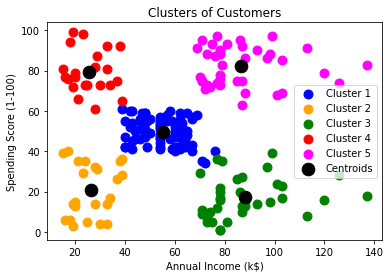

In [ ]:
# VISUALISASI HASIL CLUSTERING

plt.scatter(ann_kmeans0, spend_kmeans0, s = 80, c = "blue", label = "Cluster 1")
plt.scatter(ann_kmeans1, spend_kmeans1, s = 80, c = "orange", label = "Cluster 2")
plt.scatter(ann_kmeans2, spend_kmeans2, s = 80, c = "green", label = "Cluster 3")
plt.scatter(ann_kmeans3, spend_kmeans3, s = 80, c = "red", label = "Cluster 4")
plt.scatter(ann_kmeans4, spend_kmeans4, s = 80, c = "magenta", label = "Cluster 5")

# Centroid
plt.scatter(centroid_cluster[:, 0], centroid_cluster[:, 1], s = 160, c = "black", label = "Centroids")

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [ ]:
# Memasukkan kembali "Customer ID"-nya
hasil_kmeans["CustomerID"] = dataset["CustomerID"]
hasil_kmeans.head()

,Annual Income (k$),Spending Score (1-100),cluster,CustomerID
0,15,39,1,1
1,15,81,3,2
2,16,6,1,3
3,16,77,3,4
4,17,40,1,5


In [ ]:
# Menyimpan hasil clustering 
hasil_kmeans.to_csv("Hasil Clustering Menggunakan K-Means.csv", index = False)

### Kesimpulan (K-Means)

1. Cluster 1 -> Annual Income SEDANG, Spending Score SEDANG
2. Cluster 2 -> Annual Income RENDAH, Spending Score RENDAH
3. Cluster 3 -> Annual Income TINGGI, Spending Score RENDAH
4. Cluster 4 -> Annual Income RENDAH, Spending Score TINGGI
5. Cluster 5 -> Annual Income TINGGI, Spending Score TINGGI

## 2. HIERARCHICAL CLUSTERING

In [ ]:
import scipy.cluster.hierarchy as sch

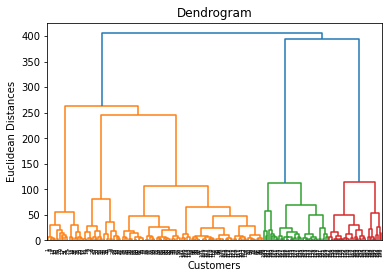

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

# Memotongnya di garis vertikal yang paling panjang
# Dia tidak berpotongan dengan garis horizontal manapun
# Di horizontalnya, yang memotong paling banyak titik

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
ac = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")

In [ ]:
ac.fit(X)

AgglomerativeClustering(n_clusters=5)

In [ ]:
ac.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [ ]:
# Cara lain untuk melihat hasil cluster
# y_pred = ac.fit_predict(X)

In [ ]:
hasil_ac = X.copy()
hasil_ac["cluster"] = ac.labels_

In [ ]:
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### Visualisasi Hasil Clustering (Agglomerative)

Text(0, 0.5, 'Frekuensi')

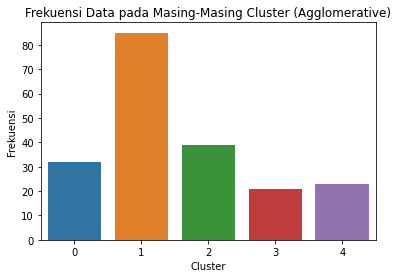

In [ ]:
cluster_x1 = hasil_ac["cluster"].value_counts().index
cluster_y1 = hasil_ac["cluster"].value_counts().values

sns.barplot(cluster_x1, cluster_y1)
plt.title("Frekuensi Data pada Masing-Masing Cluster (Agglomerative)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

In [ ]:
#sns.pairplot(hasil_ac, hue = "cluster")

In [ ]:
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [ ]:
ann_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 0]
spend_ac0 = hasil_ac[hasil_ac["cluster"] == 0].iloc[:, 1]

ann_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 0]
spend_ac1 = hasil_ac[hasil_ac["cluster"] == 1].iloc[:, 1]

ann_ac2 = hasil_ac[hasil_ac["cluster"] == 2].iloc[:, 0]
spend_ac2 = hasil_ac[hasil_ac["cluster"] == 2].iloc[:, 1]

ann_ac3 = hasil_ac[hasil_ac["cluster"] == 3].iloc[:, 0]
spend_ac3 = hasil_ac[hasil_ac["cluster"] == 3].iloc[:, 1]

ann_ac4 = hasil_ac[hasil_ac["cluster"] == 4].iloc[:, 0]
spend_ac4 = hasil_ac[hasil_ac["cluster"] == 4].iloc[:, 1]

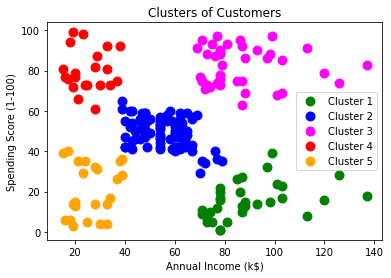

In [ ]:
# VISUALISASI HASIL CLUSTERING (AGGLOMERATIVE)

plt.scatter(ann_ac0, spend_ac0, s = 80, c = "green", label = "Cluster 1")
plt.scatter(ann_ac1, spend_ac1, s = 80, c = "blue", label = "Cluster 2")
plt.scatter(ann_ac2, spend_ac2, s = 80, c = "magenta", label = "Cluster 3")
plt.scatter(ann_ac3, spend_ac3, s = 80, c = "red", label = "Cluster 4")
plt.scatter(ann_ac4, spend_ac4, s = 80, c = "orange", label = "Cluster 5")

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [ ]:
# Memasukkan kembali "Customer ID"-nya
hasil_ac["CustomerID"] = dataset["CustomerID"]
hasil_ac.head()

,Annual Income (k$),Spending Score (1-100),cluster,CustomerID
0,15,39,4,1
1,15,81,3,2
2,16,6,4,3
3,16,77,3,4
4,17,40,4,5


In [ ]:
# Menyimpan hasil clustering 
hasil_ac.to_csv("Hasil Clustering Menggunakan Agglomerative.csv", index = False)

### Kesimpulan (Agglomerative)

1. Cluster 1 -> Annual Income TINGGI, Spending Score RENDAH
2. Cluster 2 -> Annual Income SEDANG, Spending Score SEDANG
3. Cluster 3 -> Annual Income TINGGI, Spending Score TINGGI
4. Cluster 4 -> Annual Income RENDAH, Spending Score TINGGI
5. Cluster 5 -> Annual Income RENDAH, Spending Score RENDAH